## Linearity

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

insurance_df= pd.read_csv('Data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
insurance_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


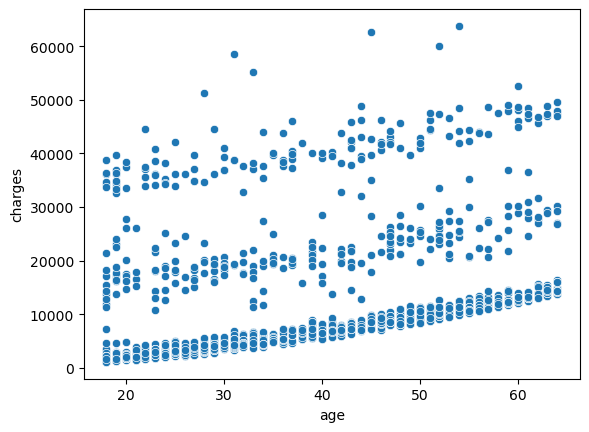

In [3]:
sns.scatterplot(insurance_df, x='age', y='charges');

In [4]:
#insurance_df = insurance_df.assign(age_sq = insurance_df['age']**2)

features = ['age','bmi', 'children']

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           8.80e-37
Time:                        16:03:00   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

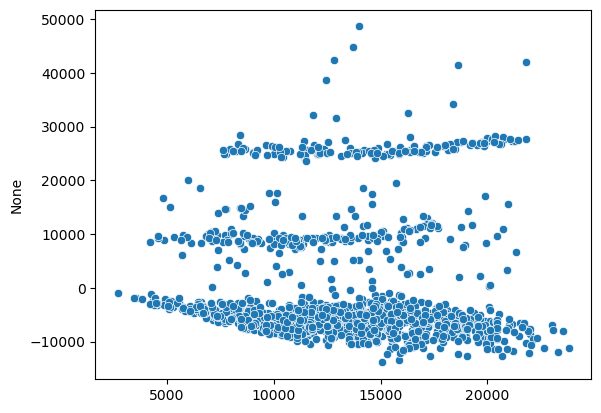

In [5]:
sns.scatterplot(x=model.predict(), y=model.resid);

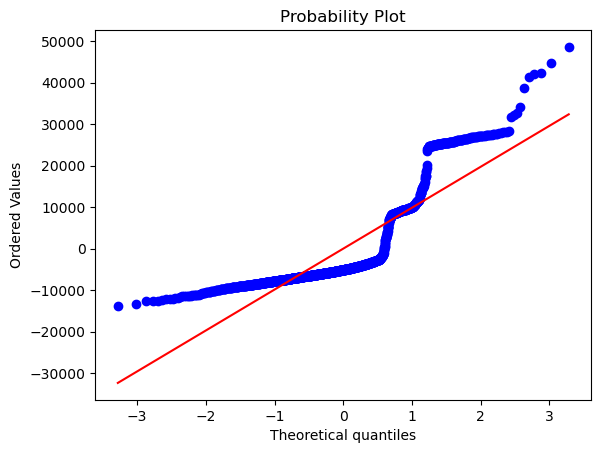

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt

stats.probplot(model.resid, dist='norm', plot=plt);

In [7]:
features = ['age','bmi', 'children']

X = sm.add_constant(insurance_df[features])
y = np.log(insurance_df['charges'])

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.303
Model:                            OLS   Adj. R-squared:                  0.302
Method:                 Least Squares   F-statistic:                     193.7
Date:                Tue, 07 Oct 2025   Prob (F-statistic):          2.82e-104
Time:                        16:03:00   Log-Likelihood:                -1543.9
No. Observations:                1338   AIC:                             3096.
Df Residuals:                    1334   BIC:                             3117.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3189      0.119     61.643      0.000       7.086       7.552
age            0.0336      0.002     22.331      0.000       0.031       0.037
bmi            0.0113      0.003      3.252      0.001       0.004       0.018
children       0.1057      0.017      6.058      0.000       0.071       0.140
==============================================================================
Omnibus:                      193.792   Durbin-Watson:                   2.027
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              285.149
Skew:                           1.125   Prob(JB):                     1.20e-62
Kurtosis:                       3.219   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

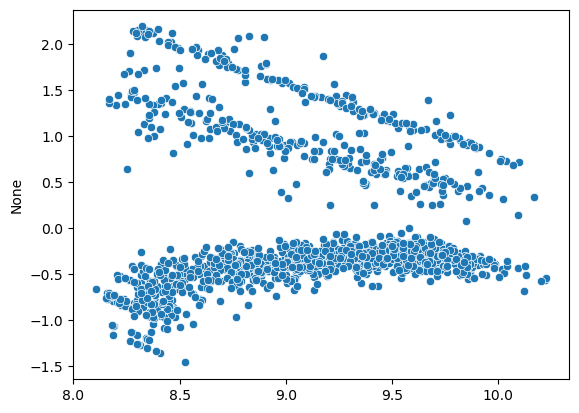

In [8]:
sns.scatterplot(x=model.predict(), y=model.resid);

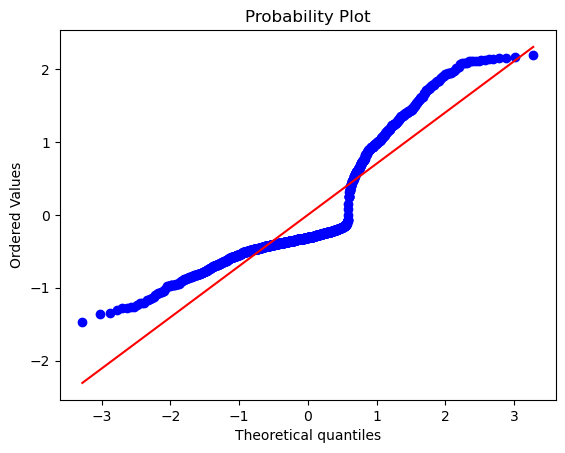

In [9]:
stats.probplot(model.resid, dist='norm', plot=plt);

In [10]:
def residual_analysis_plots(model):
    import scipy.stats as stats
    import matplotlib.pyplot as plt

    predictions = model.predict()
    residuals = model = model.resid

    fig, ax = plt.subplots(1, 2, sharey='all', figsize=(10,6))

    sns.scatterplot(x=predictions, y=residuals, ax=ax[0])
    ax[0].set_title('Residual Plot')
    ax[0].set_xlabel('Prediction')
    ax[0].set_ylabel('Residuals')

    stats.probplot(residuals, dist='norm', plot=ax[1])
    ax[1].set_title('Normal Q-Q Plot')

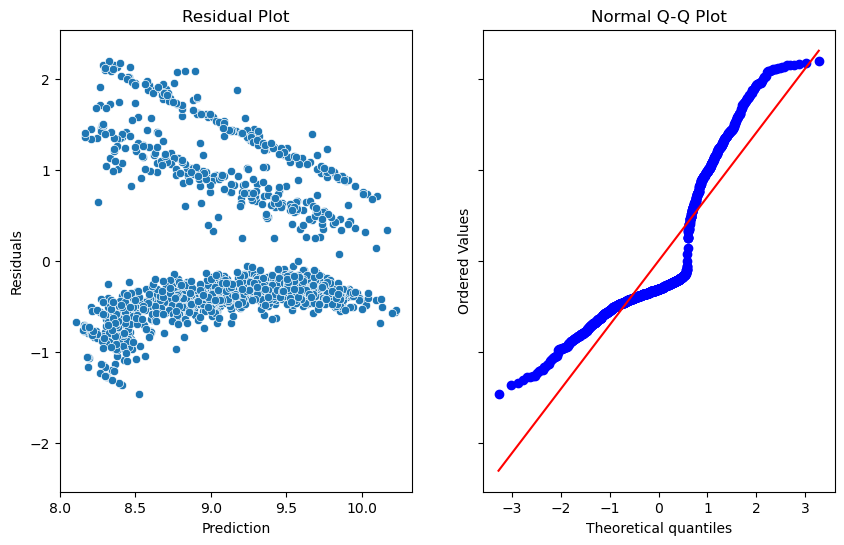

In [11]:
residual_analysis_plots(model)

In [15]:
insurance_df = insurance_df.assign(
    smoker_flag = np.where(insurance_df['smoker'] == 'yes', 1, 0),
    female_flag = np.where(insurance_df['sex'] == 'female', 1, 0),
    bmi_smoker_int = insurance_df['bmi'] * insurance_df['smoker_flag'],
    # age_bmi_int = insurance_df['bmi'] * insurance_df['age'],
    # smoker_sex_int = insurance_df['smoker_flag'] * insurance_df['female_flag'],
    # age_smoker_int = insurance_df['age'] * insurance_df['smoker_flag'],
    age_sq = insurance_df['age']** 2,
) #.query('charges < 20000')

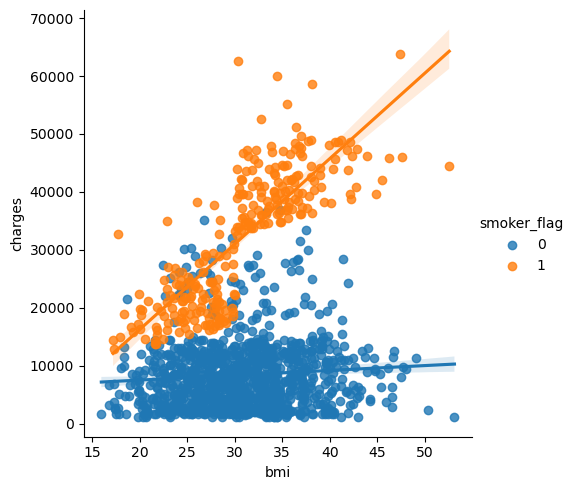

In [16]:
sns.lmplot(insurance_df, x='bmi', y='charges', hue='smoker_flag');

In [32]:
insurance_df['age2x'] = insurance_df['age']*2

In [36]:
features = [
    'age',
    #'age2x',
    'age_sq',
    'bmi',
    'children',
    'smoker_flag',
    #'female_flag',
    'bmi_smoker_int',
    #'age_bmi_int',
    #'smoker_sex_int'
]

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']
#y = np.sqrt(insurance_df['charges'])
#y = np.log(insurance_df['charges'])
#y = np.log10(insurance_df['charges'])
#y = 1/(insurance_df['charges'])

#box-cox

from scipy.stats import boxcox

# y, fitted_lambda = boxcox(insurance_df['charges'])

# sns.histplot(boxcox_y).set(xlabel='box_cox_price', title='Box-Cox Transfomation')

# sns.despine()

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     1177.
Date:                Tue, 07 Oct 2025   Prob (F-statistic):               0.00
Time:                        16:58:02   Log-Likelihood:                -13246.
No. Observations:                1338   AIC:                         2.651e+04
Df Residuals:                    1331   BIC:                         2.654e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           2343.6991   1372.084      1.708      0.088    -347.983    5035.381
age              -32.2109     64.921     -0.496      0.620    -159.570      95.148
age_sq             3.7471      0.810      4.627      0.000       2.158       5.336
bmi                2.4936     24.694      0.101      0.920     -45.950      50.937
children         667.5636    115.007      5.805      0.000     441.949     893.178
smoker_flag    -2.012e+04   1642.054    -12.253      0.000   -2.33e+04   -1.69e+04
bmi_smoker_int  1431.6963     52.424     27.310      0.000    1328.853    1534.540
==============================================================================
Omnibus:                      732.227   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4630.947
Skew:                           2.567   Prob(JB):                         0.00
Kurtosis:                      10.531   Cond. No.                     2.70e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.7e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

pd.Series(
    [vif(X.values, i) for i in range(X.shape[1])],
    index=X.columns
)

const             107.805592
age                47.608100
age_sq             47.563585
bmi                 1.297591
children            1.099845
smoker_flag        25.144043
bmi_smoker_int     25.450244
dtype: float64

<Axes: xlabel='charges', ylabel='Count'>

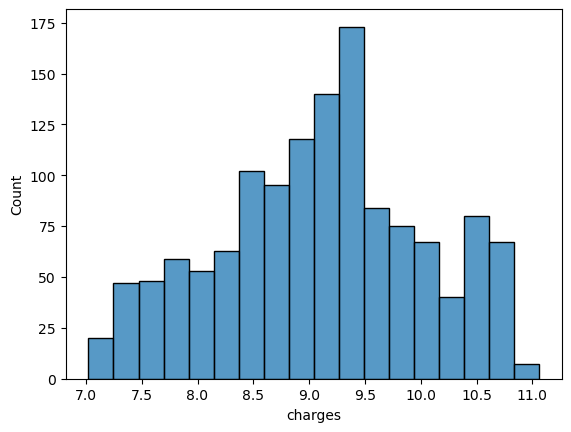

In [30]:
#y = insurance_df['charges']
#y = np.sqrt(insurance_df['charges'])
y = np.log(insurance_df['charges'])
#y = np.log10(insurance_df['charges'])
#y = 1/(insurance_df['charges'])

sns.histplot(y)

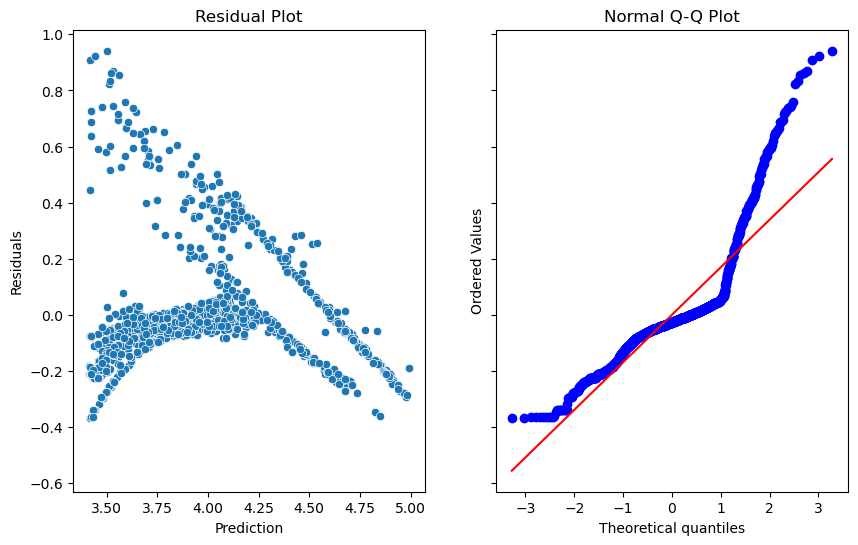

In [31]:
residual_analysis_plots(model)

## Outliers, Leverage & Influence

In [38]:
features = [
    'age',
    'bmi',
    'children',
]

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           8.80e-37
Time:                        17:29:31   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

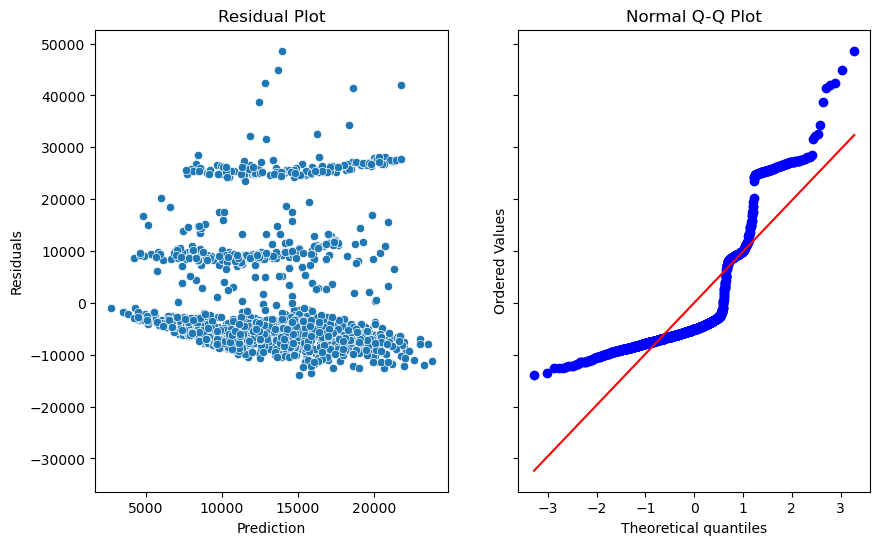

In [39]:
residual_analysis_plots(model)

In [41]:
influence = model.get_influence()
inf_summary_df = influence.summary_frame()
inf_summary_df.head()

,dfb_const,dfb_age,dfb_bmi,dfb_children,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,0.030072,-0.032742,-0.006998,-0.020343,0.000560,0.878503,0.002896,0.047341,0.878427,0.047337
1,-0.006354,0.028187,-0.012165,0.000362,0.000300,-0.654733,0.002796,-0.034669,-0.654593,-0.034661
2,0.000796,0.017443,-0.008812,-0.030880,0.000409,-0.699483,0.003334,-0.040456,-0.699349,-0.040448
3,0.051061,-0.008569,-0.040748,-0.028525,0.000937,1.183479,0.002668,0.061214,1.183657,0.061223
4,-0.011683,0.006981,0.003602,0.013831,0.000128,-0.570894,0.001573,-0.022659,-0.570750,-0.022653


In [43]:
inf_summary_df['cooks_d'].sort_values(ascending=False).round(2)

543     0.03
1047    0.02
1230    0.01
1156    0.01
860     0.01
        ... 
264     0.00
746     0.00
353     0.00
427     0.00
1272    0.00
Name: cooks_d, Length: 1338, dtype: float64